In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 100

In [ ]:
directory_path = '/content/drive/MyDrive/PlantVillage'

In [ ]:
base_model = InceptionV3(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS),
                         include_top=False,
                         weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
inputs = tf.keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    directory_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
)

Found 1724 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Epoch 1/100
54/54 [==============================] - 308s 6s/step - loss: 0.5511 - accuracy: 0.7680 - val_loss: 0.3499 - val_accuracy: 0.8698
Epoch 2/100
54/54 [==============================] - 41s 758ms/step - loss: 0.3116 - accuracy: 0.8817 - val_loss: 0.2746 - val_accuracy: 0.8977
Epoch 3/100
54/54 [==============================] - 41s 763ms/step - loss: 0.2481 - accuracy: 0.9159 - val_loss: 0.2035 - val_accuracy: 0.9349
Epoch 4/100
54/54 [==============================] - 42s 783ms/step - loss: 0.2160 - accuracy: 0.9275 - val_loss: 0.2091 - val_accuracy: 0.9163
Epoch 5/100
54/54 [==============================] - 40s 749ms/step - loss: 0.1948 - accuracy: 0.9374 - val_loss: 0.1907 - val_accuracy: 0.9302
Epoch 6/100
54/54 [==============================] - 40s 748ms/step - loss: 0.1726 - accuracy: 0.9466 - val_loss: 0.2222 - val_accuracy: 0.9209
Epoch 7/100
54/54 [==============================] - 42s 776ms/step - loss: 0.1670 - accuracy: 0.9478 - val_loss: 0.1699 - val_accuracy: 0

In [ ]:
test_generator = train_datagen.flow_from_directory(
    directory_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

scores = model.evaluate(test_generator)
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

Found 430 images belonging to 3 classes.
14/14 [==============================] - 9s 617ms/step - loss: 0.0900 - accuracy: 0.9698
Test Loss: 0.0900048017501831
Test Accuracy: 0.9697674512863159


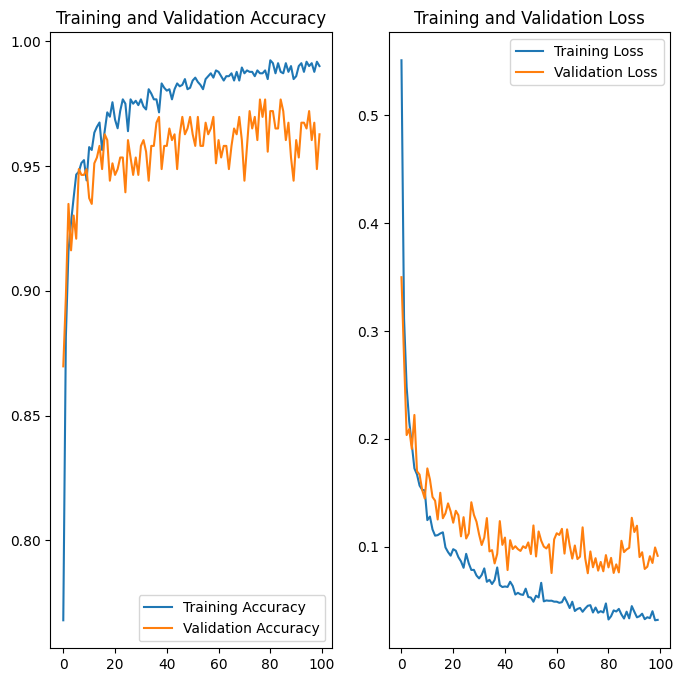

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()